#MSBA 446 - Fall 2020
##Homework 1



In this homework assignment, you are asked to develop a neural network model to classify Reuters newswires into 46 different mutually-exclusive topics. Each sample (news) belongs to one and only one category. You will need to use what you learned in the first two lectures to successfully complete this assignment. Please feel free to return to the MNIST and IMDb notebooks as there are many similarities between this homework assignment and the examples we reviewed in class. 

I wrote some code below to read the data into your notebook and to get you going. 



In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

The words in the train and test datasets are already encoded into numbers (similar to our IMDb example). Each sample is a list of integers (word indices), thus has a different length. 

We can decode them back to words easily. Let's decode the 10th training sample.

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[9]])
decoded_newswire

'? lt aramco corp has accepted japanese ? to lift a higher proportion of arab heavy crude oil under term contracts in july oil industry sources said japanese companies requested a ratio of 80 pct arab heavy to 20 pct arab light under a term contract agreement with aramco for 100 000 barrels per day the sources said the contractual ratio is 30 pct heavy crude to 70 pct light japanese demand for heavy crude oil has increased substantially since the all japan ? union ceased ? into the northern mideast gulf last month causing problems with liftings of heavy kuwait and ? crudes reuter 3'

This particular news belongs to category 16 (out of 46 categories).

In [9]:
train_labels[9]

16

Your job is to conduct a comprehensive deep learning modeling: build neural network models, try to improve them, explain your analyses clearly, elaborate on your findings, etc.    

1. Write code to see how many samples are in the train and test sets. (5 pts)
2. Vectorize the train and test data using the 'one-hot-encoding' approach discussed in class. (5 pts)
3. Vectorize the train and test labels the way it is appropriate for multi-class single-label classification. (5 pts)
4. Develop an MLP with 2 hidden layers, each having 64 neurons with ReLU activation function. Also, include the appropriate output layer based on the classification task in hand. (5 pts)
5. Compile the model. Use RMSProp optimizer with appropriate loss function, and follow the accuracy metric during training. (5 pts)
6. Shuffle and set apart 1,000 samples in the training data to use as a validation set. (5 pts)
7. Train the model for 20 epochs and use batches of size 512. Also, monitor the performance of the model on the validation set during training. Report the training and validation accuracy. (5 pts)
8.  Evaluate the model on test set and report the test accuracy. Also, predict the class for the first sample in the test set. (5 pts)
9. Use `model.summary()` to see how many trainable parameters your neural network model has. Explain why each layer has that many parameters? (5 pts)
10. Plot the training and validation loss. Also, plot the training and validation accuracy. Interpret these plots: explain if you see any signs of overfitting. (10 pts)
11. Try to improve the performance of your model using regularization methods. Try early stopping, a smaller (8 neurons per hidden layer) and a larger (256 neurons per hidden layer) network, L2 weight regularization (alpha=0.001), and dropout (p=0.1). Make sure to evaluate each model on the validation set, provide plots that help compare performance of alternative models, and interpret those plots. Eventually, pick one model as your final model. (40 pts)
12. Evaluate your final model on the test set and report the test accuracy. How does it compare to the test accuracy you obtained from your first model in Step 8? (5 pts)

Make sure you run all of your code so that the output of each code block appears below it.  Once you are done, download your final `.ipynb` file (File -> Download .ipynb) and submit it on Canvas. Name your file as follows: LastName_FirstName_HW1.ipynb

**1. Write code to see how many samples are in the train and test sets. (5 pts)**

In [36]:
# 1.Write code to see how many samples are in the train and test sets. (5 pts)

print("Train:", len(train_data))
print("Test:", len(test_data))


Train: 8982
Test: 2246


There are 8982 samples in the train set.

There are 2246 samples in the train set

**2.Vectorize the train and test data using the 'one-hot-encoding' approach discussed in class. (5 pts)**

In [37]:
# In order to decide the length of array for one hot encoding, finding out the maximum numeric value in train data and test data
max_train = max([max(i) for i in train_data])
max_test = max([max(i) for i in test_data])

print(max_train)
print(max_test)

9999
9999


9999 is the maximum encoded numeric value in both training set and testing set. So, array of size 10000 would be enough to one hot encode all training data and testing data. For labels, array of size 46 would be enough as there are 46 different mutually-exclusive topics. 

In [39]:
import numpy as np

def vectorize_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension) ===> row by column matrix
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s. ==> x[0,[1,2,3]] = 1 will get list at index 0 and sets values at 1,2,3 index of that list to 1.
    return results
  
# Our vectorized training data
vectorized_train_data = vectorize_sequences(train_data, 10000)

# Our vectorized testing data
vectorized_test_data = vectorize_sequences(test_data, 10000) 

**3. Vectorize the train and test labels the way it is appropriate for multi-class single-label classification. (5 pts)**

In [38]:
vectorized_train_labels = vectorize_sequences(train_labels, 46) #np.asarray(train_labels).astype('float32')
vectorized_test_labels = vectorize_sequences(test_labels, 46) #np.asarray(test_labels).astype('float32')


It seems that it is necessary to one hot encode labels as well. 

**4. Develop an MLP with 2 hidden layers, each having 64 neurons with ReLU activation function. Also, include the appropriate output layer based on the classification task in hand. (5 pts)**


In [40]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape = vectorized_train_data[0].shape)) # vectorized_train_data[0].shape = (10000,)
model1.add(layers.Dense(64, activation = 'relu'))
model1.add(layers.Dense(46, activation = 'softmax'))   # Output layer

Creating model with 2 hidden layers. Each have 64 neurons with ReLU activation function. There is 1 output layer and since it is a multiclass-single label classification problem, I'm using softmax as activation function. For first layer, we need to define input shape. Since we one hot encode data into array size of 10000, input shape will be (10000,). Input shape for rest of the layer is handled my neural network automaticlly.

**5.Compile the model. Use RMSProp optimizer with appropriate loss function, and follow the accuracy metric during training. (5 pts)**

In [41]:
model1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

Since it is a Multi-class single label classification, I'm using categorical_cross entropy for loss function.

**6.Shuffle and set apart 1,000 samples in the training data to use as a validation set. (5 pts)**

In [43]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(vectorized_train_data, vectorized_train_labels)

val_data = x_train[:1000]
partial_train_data = x_train[1000:]

val_labels = y_train[:1000]
partial_train_labels = y_train[1000:]

**7.Train the model for 20 epochs and use batches of size 512. Also, monitor the performance of the model on the validation set during training. 
Report the training and validation accuracy. (5 pts)**

In [44]:
history_model1 = model1.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 1s 52ms/step - loss: 2.7712 - accuracy: 0.5048 - val_loss: 1.7895 - val_accuracy: 0.6840
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4629 - accuracy: 0.7050 - val_loss: 1.2840 - val_accuracy: 0.7340
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0508 - accuracy: 0.7833 - val_loss: 1.1092 - val_accuracy: 0.7730
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8146 - accuracy: 0.8340 - val_loss: 1.0270 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6408 - accuracy: 0.8710 - val_loss: 0.9609 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5117 - accuracy: 0.8975 - val_loss: 0.9128 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4149 - accuracy: 0.9139 - val_loss: 0.8803 - val_accuracy: 0.8190
Epoch 8/20
16

After training model for 20 epoch, with batch size of 512, the model is 95.90% accurate on train data and 80.80% accurate on validation data. Loss score for training data drops quickly whereas for validation data it drops in the beginning but starts to increase after epoch 11. 

**8.Evaluate the model on test set and report the test accuracy. Also, predict the class for the first sample in the test set. (5 pts)**

In [48]:
results = model1.evaluate(vectorized_test_data, vectorized_test_labels)



71/71 [==============================] - 0s 3ms/step - loss: 1.2189 - accuracy: 0.7850


Accuracy of the model on the test dataset is 78.50%.

In [51]:
predictions = model1.predict(vectorized_test_data)
predictions[0]

array([1.42609406e-06, 5.95780184e-05, 3.15181978e-07, 8.08386326e-01,
       1.89557552e-01, 2.19180296e-09, 9.36500328e-07, 9.53567451e-06,
       1.44830308e-04, 2.05952779e-06, 1.43114869e-06, 2.83725763e-04,
       1.20428112e-07, 1.11019523e-04, 7.97263233e-09, 1.58521685e-09,
       6.38316342e-05, 3.42743363e-07, 8.65239898e-08, 2.30563601e-04,
       9.53584735e-04, 2.53475482e-05, 4.37872544e-10, 1.12342796e-07,
       6.23964524e-07, 1.60618595e-06, 1.36215554e-08, 2.92055518e-07,
       4.03801860e-05, 2.27032870e-05, 3.84417064e-07, 1.02186327e-07,
       3.45772975e-07, 7.33920899e-07, 7.29441490e-06, 3.10072346e-06,
       8.30973386e-06, 6.87852378e-07, 8.65314220e-08, 7.92310748e-05,
       1.29915463e-06, 1.30663409e-07, 4.43308146e-09, 4.15452384e-08,
       5.87933651e-12, 6.70362343e-09], dtype=float32)

In [50]:
predictions[0].argmax()

3

The model predicts that the first sample in the test set belongs to category label 3 with 80.83% confidence. 

**9.Use model.summary() to see how many trainable parameters your neural network model has. Explain why each layer has that many parameters? (5 pts)**

In [52]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


The model has 647,214 trainable parameters. 

First layer: 10000*64+64. Size of each input is 10000 since we used one hot encoding with array length of 10000. we have 64 neurons in this layer and each has one bias term. So total of 64 biases. 

Second layer: 64*64+64. We have 64 outputs from first layer going in to second layer. Second layer contains 64 neurons. 64 neurons so there are 64 biases. 

Last layer: 64*46+46. We have 64 outputs from second layer going in to last layer with 46 neurons and 46 biases. 

**10.Plot the training and validation loss. Also, plot the training and validation accuracy. Interpret these plots: explain if you see any signs of overfitting. (10 pts)**

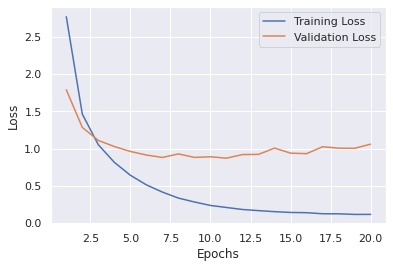

In [53]:
import seaborn as sns
sns.set() 

train_acc1  = history_model1.history['accuracy']
train_loss1 = history_model1.history['loss']
val_acc1  = history_model1.history['val_accuracy']
val_loss1 = history_model1.history['val_loss']

epochs = range(1, len(train_acc1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


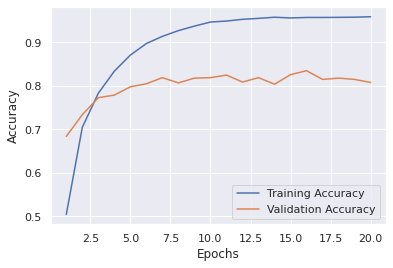

In [54]:
plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Here, in the trainig and validation loss plot, we see that training loss decreases with every epoch, whereas validation loss decreases till  epoch 6 (approx) and slowly starts increasing. 

Similarly, in training and validation accuracy plot, we see that training accuracy increases with each epoch, whereas validation accuracy increases till about epoch 6 and then starts to stay same with no improvement. 

While we see improvement in training loss and training accuracy over each epoch, we do not see similar improvement in validation loss and validation accuracy. We can say that there is no improvement in validation dataset after epoch 6 or epoch 7. This should be the stopping point of model training. Any extra iteration of training we do to the model will just contribute to overfitting. The above 2 graphs shows that model is overfitting on training dataset. Model achieved high accuracy and low loss in trainng set but performed poorly in validation set. 

**11. Try to improve the performance of your model using regularization methods. Try early stopping, a smaller (8 neurons per hidden layer) and a larger (256 neurons per hidden layer) network,
L2 weight regularization (alpha=0.001), and dropout (p=0.1). Make sure to evaluate each model on the validation set, provide plots that help compare performance of alternative models, and 
interpret those plots. Eventually, pick one model as your final model. (40 pts)**

#**Regularization methods**
**a) Early Stopping**

Since we saw no improvement in validation loss and validataion accuracy after epoch 7, I will be using only 7 epochs in early stopping approach.

In [70]:
model_ER = models.Sequential()
model_ER.add(layers.Dense(64, activation='relu', input_shape = vectorized_train_data[0].shape))
model_ER.add(layers.Dense(64, activation='relu'))
model_ER.add(layers.Dense(46, activation='softmax'))

model_ER.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model_ER = model_ER.fit(partial_train_data,
                            partial_train_labels,
                            epochs=7,
                            batch_size=512,
                            validation_data=(val_data, val_labels))

Epoch 1/7
16/16 [==============================] - 1s 54ms/step - loss: 2.7079 - accuracy: 0.5227 - val_loss: 1.7482 - val_accuracy: 0.6690
Epoch 2/7
16/16 [==============================] - 1s 46ms/step - loss: 1.4467 - accuracy: 0.7065 - val_loss: 1.2960 - val_accuracy: 0.7360
Epoch 3/7
16/16 [==============================] - 1s 45ms/step - loss: 1.0420 - accuracy: 0.7839 - val_loss: 1.0944 - val_accuracy: 0.7670
Epoch 4/7
16/16 [==============================] - 1s 44ms/step - loss: 0.8081 - accuracy: 0.8315 - val_loss: 1.0078 - val_accuracy: 0.7820
Epoch 5/7
16/16 [==============================] - 1s 46ms/step - loss: 0.6401 - accuracy: 0.8651 - val_loss: 0.9440 - val_accuracy: 0.7940
Epoch 6/7
16/16 [==============================] - 1s 47ms/step - loss: 0.5122 - accuracy: 0.8910 - val_loss: 0.9108 - val_accuracy: 0.7950
Epoch 7/7
16/16 [==============================] - 1s 46ms/step - loss: 0.4154 - accuracy: 0.9112 - val_loss: 0.8720 - val_accuracy: 0.8170


In [67]:
results = model_ER.evaluate(val_data, val_labels)



32/32 [==============================] - 0s 4ms/step - loss: 0.8980 - accuracy: 0.7970


**b) A smaller (8 neurons per hidden layer)**

In [71]:

model_SHL = models.Sequential()
model_SHL.add(layers.Dense(8, activation='relu', input_shape = vectorized_train_data[0].shape))
model_SHL.add(layers.Dense(8, activation='relu'))
model_SHL.add(layers.Dense(46, activation='softmax'))

model_SHL.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model_SHL = model_SHL.fit(partial_train_data,
                            partial_train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 3.7932 - accuracy: 0.0430 - val_loss: 3.7216 - val_accuracy: 0.0560
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 3.6379 - accuracy: 0.0515 - val_loss: 3.5266 - val_accuracy: 0.0570
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 3.4153 - accuracy: 0.0549 - val_loss: 3.2839 - val_accuracy: 0.0630
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 3.1480 - accuracy: 0.1931 - val_loss: 3.0026 - val_accuracy: 0.3740
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 2.8424 - accuracy: 0.3716 - val_loss: 2.6882 - val_accuracy: 0.4280
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 2.5122 - accuracy: 0.4448 - val_loss: 2.3676 - val_accuracy: 0.4760
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 2.1927 - accuracy: 0.5264 - val_loss: 2.0791 - val_accuracy: 0.6570
Epoch 8/20
16

In [86]:
results = model_SHL.evaluate(val_data, val_labels)



32/32 [==============================] - 0s 2ms/step - loss: 1.2665 - accuracy: 0.7040


**c) A larger (256 neurons per hidden layer) network**

In [72]:

model_LHL = models.Sequential()
model_LHL.add(layers.Dense(256, activation='relu', input_shape = vectorized_train_data[0].shape))
model_LHL.add(layers.Dense(256, activation='relu'))
model_LHL.add(layers.Dense(46, activation='softmax'))

model_LHL.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model_LHL = model_LHL.fit(partial_train_data,
                            partial_train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 3s 213ms/step - loss: 1.9807 - accuracy: 0.5685 - val_loss: 1.2175 - val_accuracy: 0.7290
Epoch 2/20
16/16 [==============================] - 3s 181ms/step - loss: 0.9465 - accuracy: 0.7905 - val_loss: 0.9743 - val_accuracy: 0.7910
Epoch 3/20
16/16 [==============================] - 2s 156ms/step - loss: 0.6205 - accuracy: 0.8652 - val_loss: 0.8774 - val_accuracy: 0.8050
Epoch 4/20
16/16 [==============================] - 2s 144ms/step - loss: 0.4165 - accuracy: 0.9070 - val_loss: 0.8413 - val_accuracy: 0.8230
Epoch 5/20
16/16 [==============================] - 2s 143ms/step - loss: 0.3064 - accuracy: 0.9301 - val_loss: 0.8173 - val_accuracy: 0.8400
Epoch 6/20
16/16 [==============================] - 3s 171ms/step - loss: 0.2163 - accuracy: 0.9470 - val_loss: 0.8593 - val_accuracy: 0.8290
Epoch 7/20
16/16 [==============================] - 3s 165ms/step - loss: 0.1828 - accuracy: 0.9530 - val_loss: 0.8712 - val_accuracy: 0.8190
Epoch 

In [87]:
results = model_LHL.evaluate(val_data, val_labels)



32/32 [==============================] - 0s 6ms/step - loss: 1.0261 - accuracy: 0.8160


**d) L2 weight regularization (alpha=0.001)**

In [73]:
model_L2 = models.Sequential()
model_L2.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape = vectorized_train_data[0].shape))
model_L2.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_L2.add(layers.Dense(46, activation='softmax'))

model_L2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model_L2 = model_L2.fit(partial_train_data,
                            partial_train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.7765 - accuracy: 0.4892 - val_loss: 1.8692 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.5959 - accuracy: 0.6966 - val_loss: 1.4546 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.2491 - accuracy: 0.7680 - val_loss: 1.3254 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0565 - accuracy: 0.8113 - val_loss: 1.2316 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9205 - accuracy: 0.8400 - val_loss: 1.1651 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8242 - accuracy: 0.8647 - val_loss: 1.1431 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.7443 - accuracy: 0.8844 - val_loss: 1.1097 - val_accuracy: 0.8010
Epoch 8/20
16

In [88]:
results = model_L2.evaluate(val_data, val_labels)

32/32 [==============================] - 0s 4ms/step - loss: 1.0569 - accuracy: 0.8200


**e) Dropout (p=0.1)**

In [74]:
model_drop = models.Sequential()
model_drop.add(layers.Dense(64, activation='relu', input_shape = vectorized_train_data[0].shape))
model_drop.add(layers.Dropout(0.1))
model_drop.add(layers.Dense(64, activation='relu'))
model_drop.add(layers.Dropout(0.1))
model_drop.add(layers.Dense(46, activation='softmax'))

model_drop.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model_drop = model_drop.fit(partial_train_data,
                            partial_train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_data=(val_data, val_labels))

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 2.7111 - accuracy: 0.4615 - val_loss: 1.7481 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.5505 - accuracy: 0.6744 - val_loss: 1.3075 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.1709 - accuracy: 0.7428 - val_loss: 1.1654 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.9535 - accuracy: 0.7910 - val_loss: 1.0548 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.7812 - accuracy: 0.8262 - val_loss: 0.9764 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6503 - accuracy: 0.8549 - val_loss: 0.9356 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5496 - accuracy: 0.8785 - val_loss: 0.9122 - val_accuracy: 0.7970
Epoch 8/20
16

In [89]:
results = model_drop.evaluate(val_data, val_labels)

32/32 [==============================] - 0s 3ms/step - loss: 1.0258 - accuracy: 0.8100


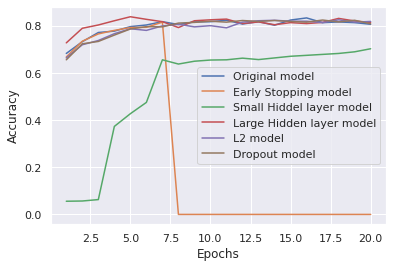

In [109]:
val_ER_acc  = history_model_ER.history['val_accuracy']
val_SHL_acc = history_model_SHL.history['val_accuracy']
val_LHL_acc = history_model_LHL.history['val_accuracy']
val_L2_acc = history_model_L2.history['val_accuracy']
val_drop_acc = history_model_drop.history['val_accuracy']

epochs = range(1, len(val_acc1) + 1)

plt.plot(epochs, val_acc1, label = 'Original model')
plt.plot(epochs, val_ER_acc + [0,0,0,0,0,0,0,0,0,0,0,0,0], label = 'Early Stopping model')
plt.plot(epochs, val_SHL_acc, label = 'Small Hiddel layer model')
plt.plot(epochs, val_LHL_acc, label = 'Large Hidden layer model')
plt.plot(epochs, val_L2_acc, label = 'L2 model')
plt.plot(epochs, val_drop_acc, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



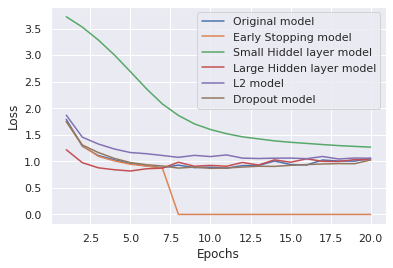

In [110]:
val_ER_loss  = history_model_ER.history['val_loss']
val_SHL_loss = history_model_SHL.history['val_loss']
val_LHL_loss = history_model_LHL.history['val_loss']
val_L2_loss = history_model_L2.history['val_loss']
val_drop_loss = history_model_drop.history['val_loss']

epochs = range(1, len(val_loss1) + 1)

plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_ER_loss + [0,0,0,0,0,0,0,0,0,0,0,0,0], label = 'Early Stopping model')
plt.plot(epochs, val_SHL_loss, label = 'Small Hiddel layer model')
plt.plot(epochs, val_LHL_loss, label = 'Large Hidden layer model')
plt.plot(epochs, val_L2_loss, label = 'L2 model')
plt.plot(epochs, val_drop_loss, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



Additional 13 zeros were introduced for Early stopping model to make sure array sized were same for all models. Ploting for model with Early stopping separately below

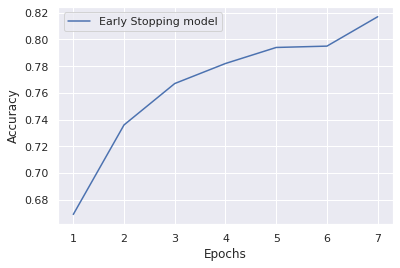

In [97]:
epochs = range(1, len(val_ER_acc) + 1)
plt.plot(epochs, val_ER_acc, label = 'Early Stopping model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


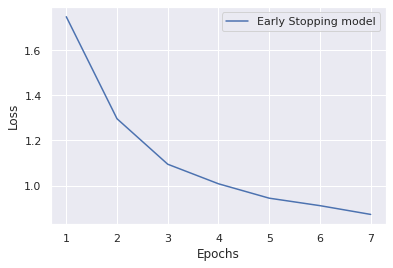

In [96]:
epochs = range(1, len(val_ER_acc) + 1)
plt.plot(epochs, val_ER_loss, label = 'Early Stopping model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


From graph, it is obvious that Small hidden layer performs worst. So, plotting graph again without data regarding small hidden layer

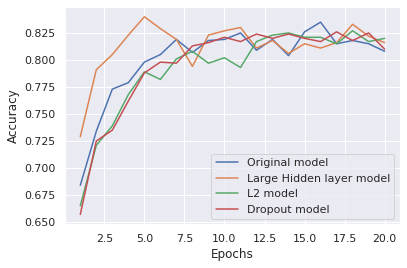

In [113]:
epochs = range(1, len(val_acc1) + 1)

plt.plot(epochs, val_acc1, label = 'Original model')
#plt.plot(epochs, val_ER_acc, label = 'Early Stopping model')
plt.plot(epochs, val_LHL_acc, label = 'Large Hidden layer model')
plt.plot(epochs, val_L2_acc, label = 'L2 model')
plt.plot(epochs, val_drop_acc, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


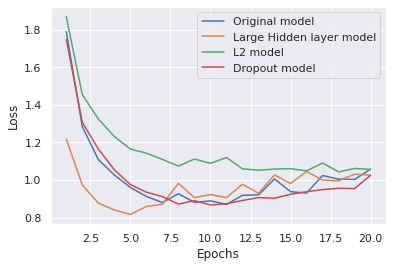

In [107]:
epochs = range(1, len(val_loss1) + 1)

plt.plot(epochs, val_loss1, label = 'Original model')
#plt.plot(epochs, val_ER_loss, label = 'Early Stopping model')
plt.plot(epochs, val_LHL_loss, label = 'Large Hidden layer model')
plt.plot(epochs, val_L2_loss, label = 'L2 model')
plt.plot(epochs, val_drop_loss, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


So, out of orginal model, Large hidden layer model, L2 model and dropout model, it looks like having large hidden layer performs better. It accuracy reaches maximum around epoch 5, and also has low loss score around same epoch. However this model also seem to suffer from over fitting. Accuracy drops as number of epochs gets large. Similary loss score gradually increase after epoch 5. Now the question is if this model performs better than Early stopping model. 

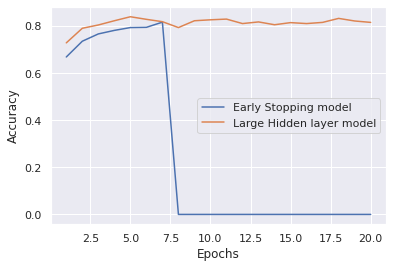

In [105]:
epochs = range(1, len(val_acc1) + 1)

plt.plot(epochs, val_ER_acc+ [0,0,0,0,0,0,0,0,0,0,0,0,0], label = 'Early Stopping model')
plt.plot(epochs, val_LHL_acc, label = 'Large Hidden layer model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


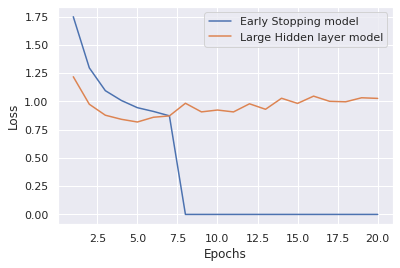

In [104]:
epochs = range(1, len(val_loss1) + 1)

plt.plot(epochs, val_ER_loss + [0,0,0,0,0,0,0,0,0,0,0,0,0], label = 'Early Stopping model')
plt.plot(epochs, val_LHL_loss, label = 'Large Hidden layer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Here comparing Large hidden layer method and early stopping method, it seems that large hidden layer is still better. So, I will use large hidden layer as my final model.

**12. Evaluate your final model on the test set and report the test accuracy. How does it compare to the test accuracy you obtained from your first model in Step 8? (5 pts)**

In [115]:
results = model_LHL.evaluate(vectorized_test_data, vectorized_test_labels)


71/71 [==============================] - 0s 7ms/step - loss: 1.2643 - accuracy: 0.7939


Model with large hidden layer performed slightly better than orinial model. Accuracy imporved to 79.39%. Before, with original model it was 78.5%.

Since it wasn't much of an improvement, I wonder if combining large hidden layer method with early stopping method would be better. 

In [120]:

model_LHL_ES = models.Sequential()
model_LHL_ES.add(layers.Dense(256, activation='relu', input_shape = vectorized_train_data[0].shape))
model_LHL_ES.add(layers.Dense(256, activation='relu'))
model_LHL_ES.add(layers.Dense(46, activation='softmax'))

model_LHL_ES.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model_LHL_ES = model_LHL_ES.fit(partial_train_data,
                            partial_train_labels,
                            epochs=7,
                            batch_size=512,
                            validation_data=(val_data, val_labels))

Epoch 1/7
16/16 [==============================] - 2s 136ms/step - loss: 1.9271 - accuracy: 0.5918 - val_loss: 1.1951 - val_accuracy: 0.7320
Epoch 2/7
16/16 [==============================] - 2s 128ms/step - loss: 0.9463 - accuracy: 0.7888 - val_loss: 0.9960 - val_accuracy: 0.7800
Epoch 3/7
16/16 [==============================] - 2s 124ms/step - loss: 0.6069 - accuracy: 0.8661 - val_loss: 0.8947 - val_accuracy: 0.8030
Epoch 4/7
16/16 [==============================] - 2s 123ms/step - loss: 0.4023 - accuracy: 0.9119 - val_loss: 1.0923 - val_accuracy: 0.7370
Epoch 5/7
16/16 [==============================] - 2s 123ms/step - loss: 0.2835 - accuracy: 0.9345 - val_loss: 0.9079 - val_accuracy: 0.8160
Epoch 6/7
16/16 [==============================] - 2s 127ms/step - loss: 0.2107 - accuracy: 0.9485 - val_loss: 0.9755 - val_accuracy: 0.7990
Epoch 7/7
16/16 [==============================] - 2s 126ms/step - loss: 0.1773 - accuracy: 0.9516 - val_loss: 0.9201 - val_accuracy: 0.8170


In [121]:
results = model_LHL_ES.evaluate(vectorized_test_data, vectorized_test_labels)

71/71 [==============================] - 0s 6ms/step - loss: 1.0423 - accuracy: 0.7845


Surprisingly, it is worse. 

In [122]:
results = model1.evaluate(vectorized_test_data, vectorized_test_labels)
results = model_ER.evaluate(vectorized_test_data, vectorized_test_labels)
results = model_SHL.evaluate(vectorized_test_data, vectorized_test_labels)
results = model_LHL.evaluate(vectorized_test_data, vectorized_test_labels)
results = model_L2.evaluate(vectorized_test_data, vectorized_test_labels)
results = model_drop.evaluate(vectorized_test_data, vectorized_test_labels)
results = model_LHL_ES.evaluate(vectorized_test_data, vectorized_test_labels)



71/71 [==============================] - 0s 7ms/step - loss: 1.0423 - accuracy: 0.7845
